In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import seaborn as sns
# sns.set_theme()

In [2]:
data_dir = Path(Path.home(), "Documents/xray/dev/23_crystal_sim/data")
delta_dirs = list()
delta_dirs.append(Path(data_dir, "hetero_vs_psuedo"))
delta_dirs.append(Path(data_dir, "hetero_vs_weighted_average"))
delta_dirs.append(Path(data_dir, "hetero_vs_flipped"))
delta_dirs.append(Path(data_dir, "hetero_vs_intermixed"))

all_delta_dfs = list()
for delta_dir in delta_dirs:
    delta_dfs = list()
    for delta_file in delta_dir.glob("*.csv"):
        # print(delta_file)

        delta_df = pd.read_csv(delta_file, index_col=0)
        delta_dfs.append(delta_df)

    all_delta_dfs.append(delta_dfs)

all_delta_dfs[0][0].head()



,delta_real_10,delta_imag_10,delta_real_20,delta_imag_20,delta_real_30,delta_imag_30,delta_real_40,delta_imag_40,delta_real_50,delta_imag_50,delta_real_60,delta_imag_60,delta_real_70,delta_imag_70,delta_real_80,delta_imag_80,delta_real_90,delta_imag_90,delta_real_100,delta_imag_100
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.542887e-01,2.123602e-01,-4.192627e-03,-5.770657e-03,2.211223e-02,3.043487e-02,1.677051e-03,2.308263e-03,1.250409e-02,1.721041e-02,1.739164e-03,2.393754e-03,7.588289e-03,1.044438e-02,-3.734059e-03,-5.139491e-03,2.714568e-03,3.736282e-03,-3.468141e-03,-4.773487e-03
2,-1.542887e-01,-5.013143e-02,4.192627e-03,1.362267e-03,-2.211223e-02,-7.184698e-03,-1.677051e-03,-5.449069e-04,-1.250409e-02,-4.062826e-03,-1.739164e-03,-5.650886e-04,-7.588289e-03,-2.465585e-03,3.734059e-03,1.213269e-03,-2.714568e-03,-8.820166e-04,3.468141e-03,1.126867e-03
10,1.542887e-01,-2.123602e-01,-4.192627e-03,5.770657e-03,2.211223e-02,-3.043487e-02,1.677051e-03,-2.308263e-03,1.250409e-02,-1.721041e-02,1.739164e-03,-2.393754e-03,7.588289e-03,-1.044438e-02,-3.734059e-03,5.139491e-03,2.714568e-03,-3.736282e-03,-3.468141e-03,4.773487e-03
11,8.881784e-16,1.989520e-16,8.881784e-16,-2.842171e-17,8.881784e-16,2.357949e-16,8.881784e-16,-3.979039e-16,8.881784e-16,-9.822543e-17,8.881784e-16,3.368499e-17,8.881784e-16,7.623316e-17,8.881784e-16,-9.947598e-17,8.881784e-16,3.318595e-16,8.881784e-16,1.964509e-16


In [3]:
Ns = list()
for col in all_delta_dfs[0][0].columns:
    Ns.append(int(col.split("_")[2]))

Ns = list(set(Ns))
Ns = sorted(Ns)
Ns

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [4]:
for i in range(len(all_delta_dfs)):
    delta_dfs = all_delta_dfs[i]
    delta_dfs_tmp = list()
    for delta_df in delta_dfs:
        delta_df_valid = True
        for N in Ns:
            if ("delta_real_{}".format(N) not in delta_df.columns) or ("delta_imag_{}".format(N) not in delta_df.columns):
                delta_df_valid = False

        if delta_df_valid:
            delta_dfs_tmp.append(delta_df)

    all_delta_dfs[i] = delta_dfs_tmp
    print(len(all_delta_dfs[i]))

100
100
100
100


100 10
100 10
100 10
100 10


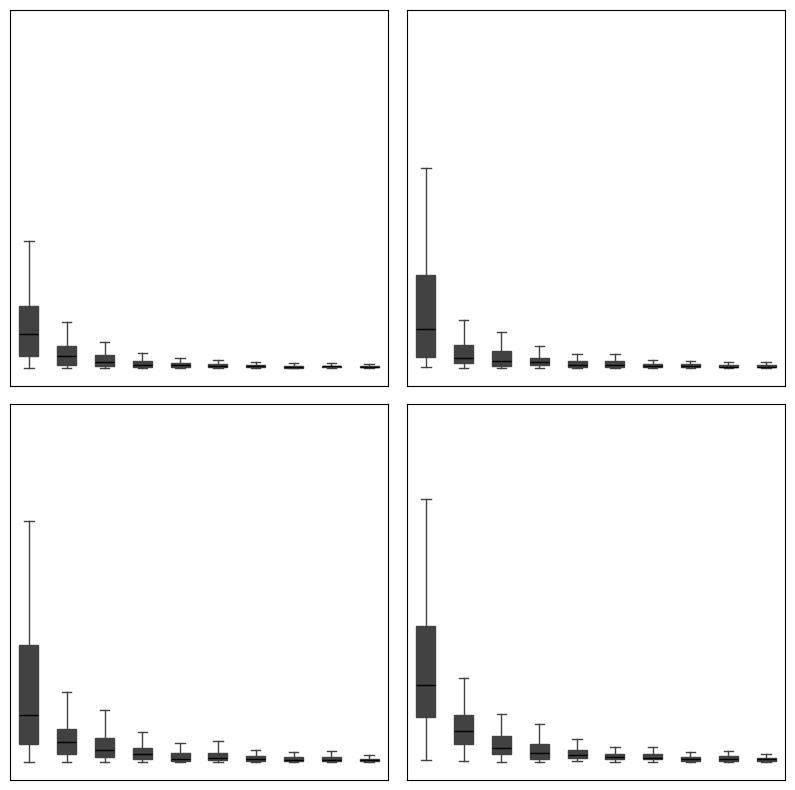

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i in range(len(all_delta_dfs)):
    delta_dfs = all_delta_dfs[i]

    all_delta_rmsds = list()
    for N in Ns:
        delta_rmsds = list()
        for delta_df in delta_dfs:
            for hkl in delta_df.index:
                delta_real = delta_df.loc[hkl, "delta_real_{}".format(N)]
                delta_imag = delta_df.loc[hkl, "delta_imag_{}".format(N)]

            delta_rmsds.append(np.sqrt(delta_real**2 + delta_imag**2))

        all_delta_rmsds.append(delta_rmsds)

    print(len(all_delta_rmsds[i]), len(Ns))

    ax = axs[int(i/2), i%2]
    ax.boxplot(
        all_delta_rmsds,
        vert=True,  # vertical box alignment
        patch_artist=True,  # fill with color
        boxprops=dict(facecolor="#424242ff", color="#424242ff"),  # Color of the box
        whiskerprops=dict(color="#424242ff"),  # Color of the whiskers
        capprops=dict(color="#424242ff"),  # Color of the caps on the whiskers
        medianprops=dict(color='black'),
        showfliers=False
    )

    ax.set_ylim(-.05, 1)
    ax.tick_params(bottom=False, labelbottom=False)
    ax.tick_params(left=False, labelleft=False)
    plt.xlabel(None)
    plt.ylabel(None)

    plt.subplots_adjust(wspace=0.05, hspace=0.05)

# plt.show()
plt.savefig(Path(Path.home(), "Desktop/fig.png"), dpi=300)